# 0. Installation
---
可以自動動手在行外電腦裝裝看 postgres <br>
[安裝網址](https://postgresql-note.readthedocs.io/en/latest/section01/Install/01_install-PostgreSQL.html) <br>
[新手教學](https://docs.postgresql.tw/tutorial)

# 1. Introduction of Database
---

資料庫可以想成資料的檔案抽屜，我們可以對這些資料有：
- 新增(CREATE)
- 查詢(READ)
- 更新(UPDATE)
- 刪除(DELETE)
簡稱為 CRUD


資料庫大致上可以分為兩種類型：

- 關聯式資料庫（Relational Database Management System，縮寫為RDBMS)
  關聯式資料庫，是由資料表（Table）、紀錄（Record）、欄位（Field）以及資料（Data）所構成的。資料表示資料存在資料庫的形式，一筆一筆橫向的資料的是記錄，直向表示一筆資料的不同屬性，稱為是欄位。
  - 市面上有許多關聯式資料庫(Related database)，常見的有：
    * Sqlite
    * MySQL
    * PostgreSQL
    * Oracle Database
    * DB2
- 非關係型資料庫（Not Only SQL，縮寫為 NoSQL）
  關聯式資料庫非常普及，但這不是唯一存取資料的方式。不是以 SQL 的這種表格方式檢索資料庫，統稱為 NoSQL 資料庫。
  - Key-Value Database：利用鍵值的格式儲存資料，取代原本關聯式資料庫中常用的固定欄位。相比之下，比關連式資料庫有更彈性的架構。
  - Document Database：文件資料庫主要是用來儲存非結構性的文件，不像一般表格那樣有固定的欄位，每個欄位有特定資料類型和大小。
  - Graph Database：最後一類是圖學資料庫，這不是專門用來處理圖片的資料庫，而是指運用圖學架構來儲存節點間關係資料架構。
  常見的非關聯式資料庫有：Redis、MongoDB。

- [資料庫的排名](https://db-engines.com/en/ranking)

- 參考資料
  - [資料庫系統應用 - 關聯式資料庫](https://ithelp.ithome.com.tw/articles/10185512)
  - [資料庫系統應用 - 非關聯式資料庫](https://ithelp.ithome.com.tw/articles/10185607)

## 1.1 Postgres 簡介
---

PostgreSQL 是美國加州伯克萊大學資訊科學系基於 [POSTGRES 4.2](https://dsf.berkeley.edu/postgres.html) 所研發的物件關聯式資料庫管理系統（ORDBMS, Object-Relational Database Management System）。POSTGRES 中的許多重要概念成為日後一些商用資料庫系統重要的一部份。

PostgreSQL 由伯克萊大學公開其原始碼所誕生，它支援了大多數的標準 SQL 語法，並提供許多先進的功能：

* 複雜查詢（complex queries）
* 外部索引鍵（foreign keys）
* 觸發器（triggers）
* 可更新檢查表（updatable views）
* 事務完整性（transactional integrity）
* 多版本併行控制（multiversion concurrency control）

同時，PostgreSQL 也支援讓使用者能以自己的方式進行擴充。比如透過新增：

* 資料型別（data types）
* 函數（functions）
* 操作（operators）
* 聚合函數（aggregate functions）
* 索引方法（index methods）
* 過程式語言（procedural languages）

並且基於自由許可證，任何人都能夠以任何目的，免費地使用、修改、與散布 PostgreSQL，不論是個人使用、商業用途還是學術研究。<br>
[參考來源](https://github.com/pgsql-tw/gitbook-docs)

## 1.2 SQL 語法
---
### DDL（Data Definition Language)
* CREATE 建立資料庫/資料表
* DROP 刪除資料庫/資料表
* ALTER 修改資料表結構

### DML（Data Manipulation Language）
* INSERT 插入資料
* SELECT 查詢資料
* UPDATE 更新資料
* DELETE 刪除資料

### DCL（Data Control Language）
* GRANT 授權使用者
* REVOKE 取消使用者權限

### TCL(Transaction Control Language)
* COMMIT 將操作更新到資料庫
* ROLLBACK 取消對資料庫的操作


## 1.3 常用 SQL 數據類型
---

- 整數類型 <br>
  - integer，4字節
  - smallint，2字節，更節省磁盤空間
  - bigint，8字節，能夠存儲的數字範圍更大
- 任意精度類型 <br>
  - NUMERIC(precision, scale) <br>
    佔用存儲空間可變，NUMERIC 類型適用於要求合理的場景，例如金融領域。<br>
    對 NUMERIC 類型的計算，如加、減、乘是合理的，但可能程度的上升帶來的速度的下降，比 INTEGER 類型和 FLOAT 類型，NUMERIC 類型的計算速度非常緩慢。<br>
    precision: 精度，可以存的總位數 <br>
    scale: 精確，小數點後的位數
- 浮點數類型 <br>
  - float4，單精度，4字節
  - float8，雙精度，8字節
- 字符類型 <br>
  - varchar(n)， 有長度限制的字符串
  - char(n)，定長字符串，長度不足則向後填充空白字符
  - text，不限長度
- 日期/時間類型 <br>
  - timestamp
  - date
  - time
  - interval

| Type     |  Name    | Memory Length   | Descriptione      |  Range                             | 
| -------- | -------- | --------        |  --------         | --------                           | 
| number   |  decimal |  可變長          | 指定的精度，精確     | 小數點前131072 位 ~ 小數點後16383 位    | 
| number   |  numeric |  可變長          | 指定的精度，精確     | 小數點前131072 位 ~ 小數點後16383 位    | 
| number   |  real    |  4              | 可變精度，不精確     |  	6 位十進制數字精度                 |  
| number   |  integer |  4              | 常用的整數          | 	-2147483648 ~+2147483647         |
| number   |  smallint |  2          | 小範圍整數     | -32768 ~ +32767    | 
| number   |  bigint |  8          | 大範圍整數     | -9223372036854775808 ~ +9223372036854775807    | 
| character | character varying(n), varchar(n) | | 變長，有長度限制 |  | 
| character | character(n), char(n)            | | f定長,不足補空白 |  | 
| character | text            | | 變長，無長度限制 |  | 
| time | timestamp            | 8 | 日期和時間，有時區 | 4713BC ~ 294276AD |
| time | timestamp            | 8 | 日期和時間，無時區 | 4713BC ~ 294276AD | 
| time | date            | 4 | 只用於日期 | 4713BC ~ 5874897AD |
| time | time            | 8 | 日期和時間，無時區 | 00:00:00 ~ 24:00:00| 
| time | time            | 12 | 日期和時間，有時區 | 00:00:00+1459 ~ 24:00:00-1459 | 
| time | interval            | 16 | 日期和時間，有時區 | -178000000 years ~ +178000000 years | 
| boolean | boolean            | 1 | true/false 第三種"unknown"(未知)狀態，用NULL 表示。 |  | 

# 2. 資料庫階層
---
- database : 資料庫
- schmeas : 綱要
- table : 表格 

想像一個資料庫是一個大型的倉庫(資料庫)，倉庫裡面有房間(綱要)，每個房間有不同的主人(權限)

而每個房間又可以擺設不同的物品，例如床、衣櫃等等，對照是我們說的表格

倉庫的主人，就是系統管理員，對於每個物品有所有的管理權，可以說是 super user

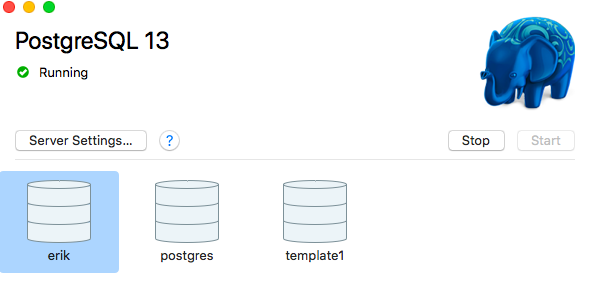

### 產生 SCHEMA
``` sql=
CREATE SCHEMA myschema
```
### 產生 TABLE
``` sql=
CREATE TABLE IF NOT EXISTS myschema.train(
    customer_id character varying(100) PRIMARY KEY,
    sex character varying(1) NOT NULL,
    height numeric(5,2) NOT NULL,
    weight numeric(5,2) NOT NULL
);
```
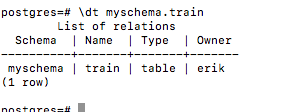

# 3. 常用 Postgres 操作指令瀏覽 (CRUD for postgres)
---

指令需在 terminal 操作

## 1. 切換資料庫
---
```
psql -U 帳號 -h hostname -d database
```

## 2. 查看所有表格
---
```
\dt
```
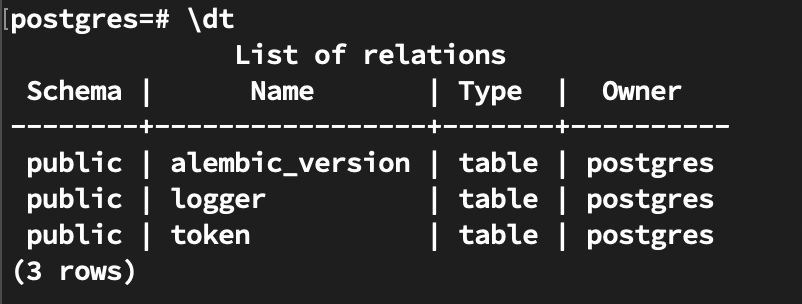

## 3. 獲得某表的詳細內容
---
```
\d 表名
```
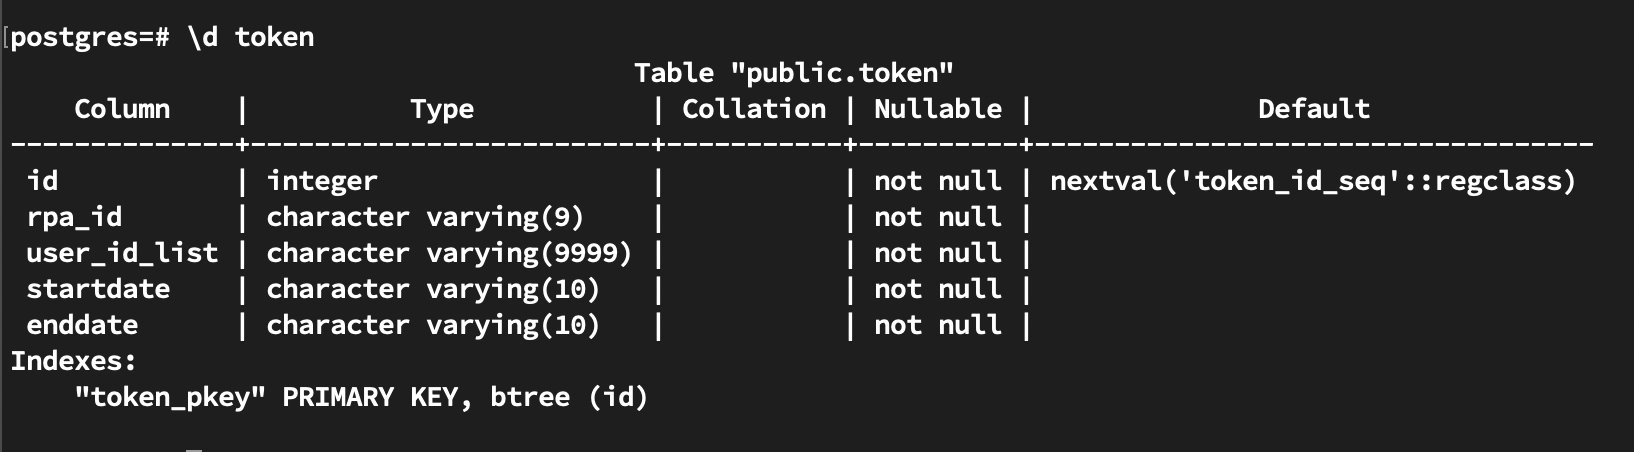

## 4. CREATE TABLE
---
- 說明
```
CREATE TABLE IF NOT EXISTS schema_name.table_name(
    column_name data_type [ DEFAULT default_expr ] [ column_constraint [ ... ] ]
);
```
- 範例
``` sql=
CREATE TABLE IF NOT EXISTS public.train(
    customer_id character varying(100) PRIMARY KEY,
    sex character varying(1) NOT NULL,
    height numeric(5,2) NOT NULL,
    weight numeric(5,2) NOT NULL
);
```
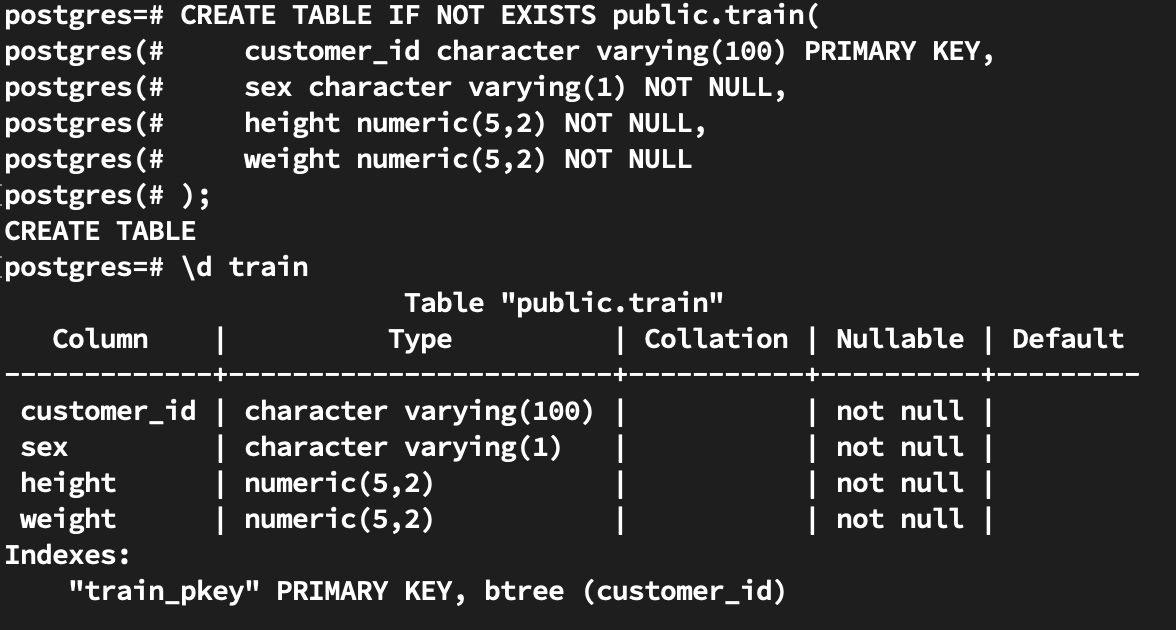

## 5. INSERT
---
- 說明
```
INSERT INTO table [ ( column [, ...] ) ]
{ DEFAULT VALUES | VALUES ( { expression | DEFAULT } [, ...] ) | query }
```
- 範例
``` SQL=
INSERT INTO train(customer_id, sex, height, weight)
VALUES ('A123456789', 'M', '180.45', '70.7');
```

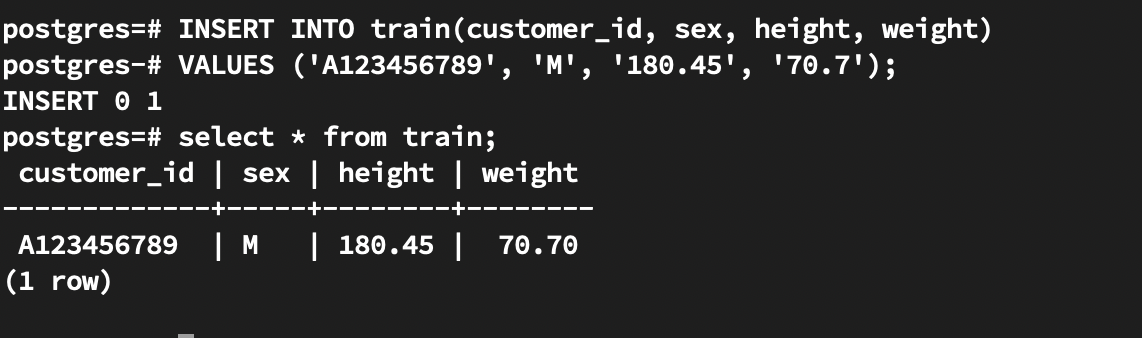

``` SQL=
INSERT INTO train(customer_id, sex, height, weight)
VALUES ('A123456789', 'M', '180.45', '70.7'),
       ('X123456789', 'M', '175.12', '65.7'),
       ('W123456789', 'W', '160.67', '45.7'),
       ('H123456789', 'W', '167.93', '52.7');
```

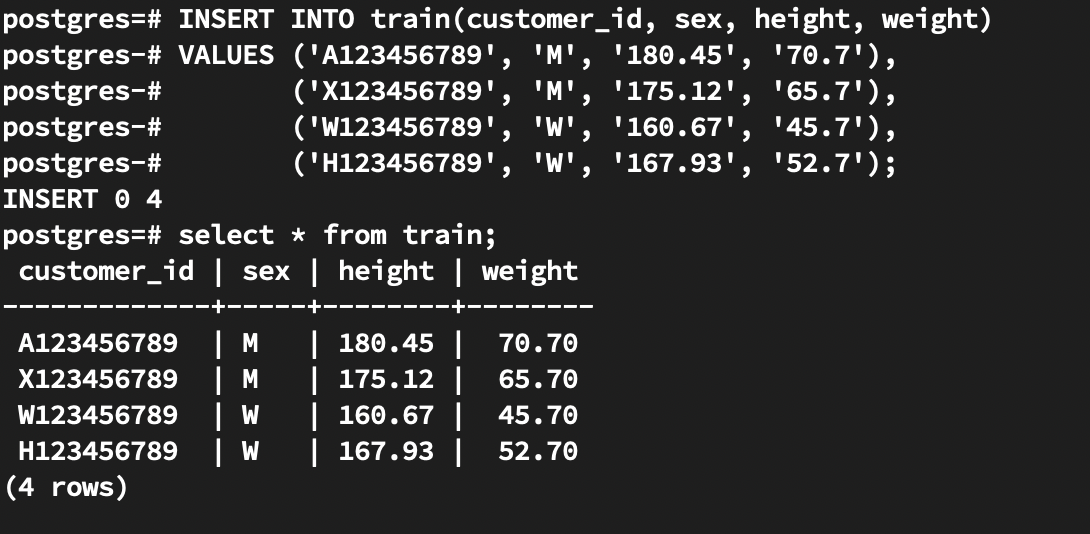

## 6. UPDATE
---
- 說明
```
UPDATE table_name
SET column1 = value1, column2 = value2...., columnN = valueN
WHERE [condition];
```
- 範例
``` SQL=
UPDATE train set sex='F' where customer_id='A123456789';
```
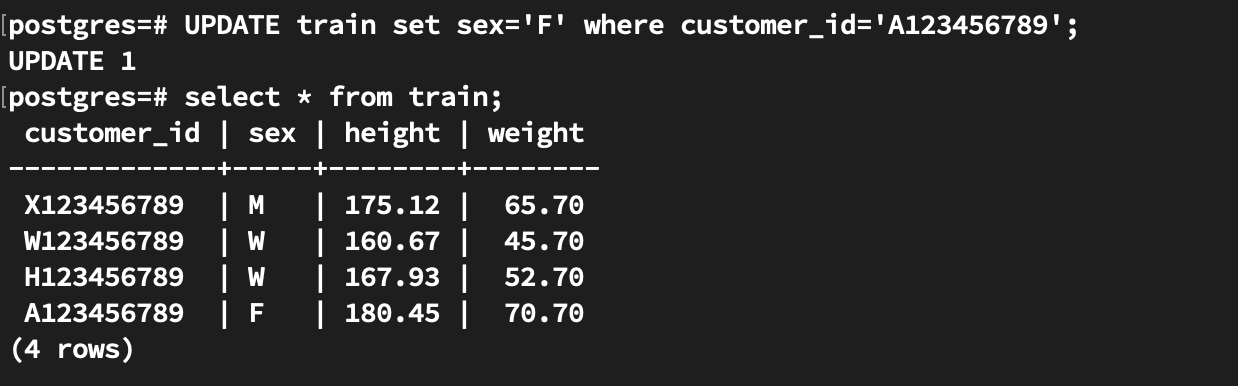

## 7. SELECT
---
- 說明
```
SELECT [ ALL | DISTINCT [ ON ( expression [, ...] ) ] ]
all expression(*) [ AS output_name ] [, ...]
[ FROM from_item [, ...] ]
[ WHERE condition ]
[ GROUP BY expression [, ...] ]
[ HAVING condition [, ...] ]
[ { UNION | INTERSECT | EXCEPT } [ ALL ] select ]
[ ORDER BY expression [ ASC | DESC | USING operator ] [, ...] ]
[ LIMIT { count | ALL } ]
[ OFFSET start ]
[ FOR UPDATE [ OF table_name [, ...] ] ]
```
- 範例
``` SQL=
select * from train where sex='M';
```
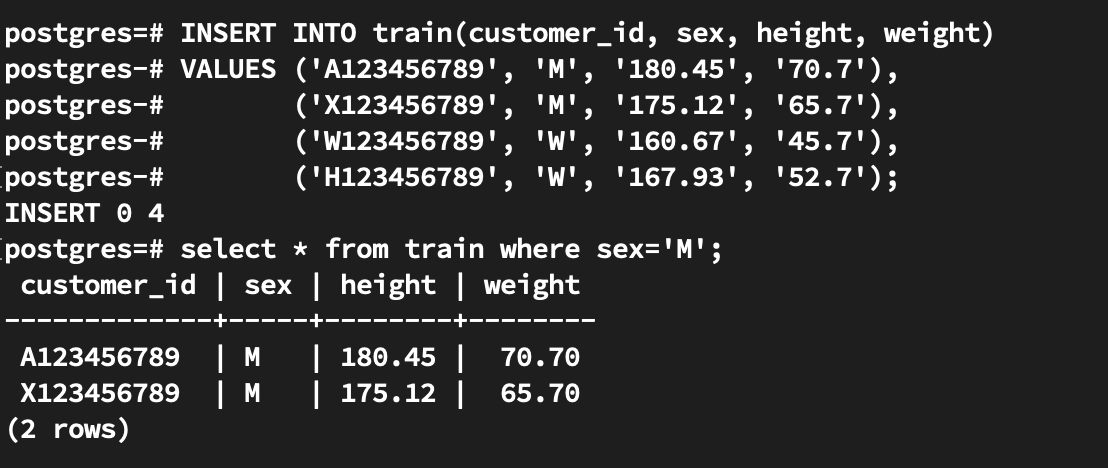

## 8. DELETE
---
- 說明
```
DELETE FROM [ ONLY ] table [ WHERE condition ]
```
- 範例
``` SQL=
DELETE FROM train where sex='M';
```
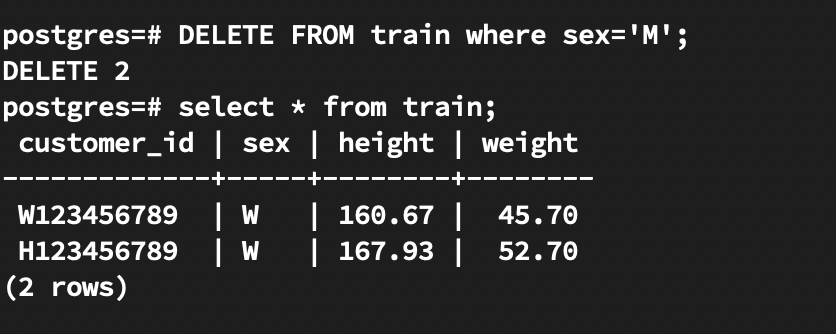

## 9. TRUNCATE
---
清空一個表
- 說明
```
TRUNCATE [ TABLE ] name
```
- 範例
``` SQL=
TRUNCATE train;
```
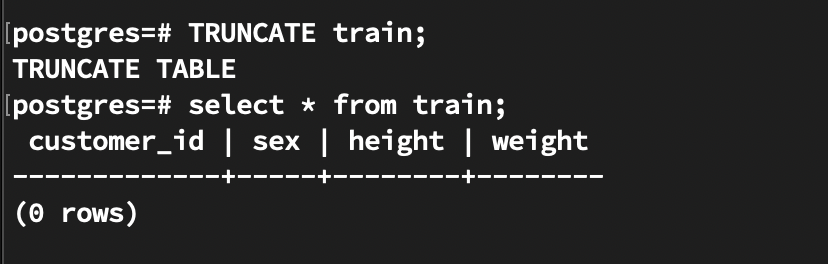

## 10. DROP TABLE
---
- 說明
```
DROP TABLE name [, ...] [ CASCADE | RESTRICT ]
```
- 範例
``` SQL=
DROP TABLE train;
```
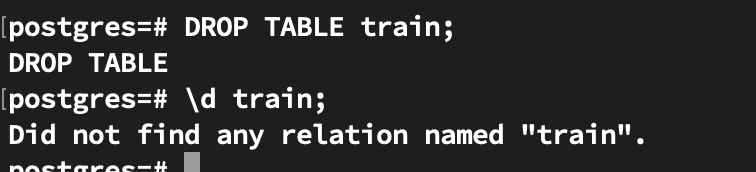

## 11. GRANT
---
```
GRANT { USAGE | ALL [ PRIVILEGES ] }
ON LANGUAGE lang_name [, ...]
TO { username | GROUP group_name | PUBLIC } [, ...] [ WITH GRANT OPTION ]
```
``` SQL=
GRANT ALL PRIVILEGES ON train to postgres;
```
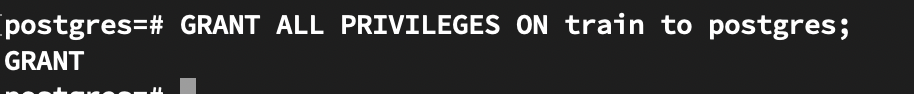

# 4. 使用 python 操作 Postgres(psycopg2)
---

## 步驟 1：連線
---

In [16]:
import psycopg2

# Update connection string information
host = "localhost"
dbname = "erik"
user = "erik"
password = "1110"
sslmode = "allow"

# Construct connection string
conn_string = "host={0} user={1} dbname={2} password={3} sslmode={4}".format(host, user, dbname, password, sslmode)
conn = psycopg2.connect(conn_string)
print("Connection established")


Connection established


## 步驟 2：CREATE SCHEMA and INSERT
---

In [3]:
cursor = conn.cursor()

# Drop previous table of same name if one exists
cursor.execute("DROP TABLE IF EXISTS inventory;")
print("Finished dropping table (if existed)")

# Create a table
cursor.execute("CREATE TABLE inventory (id serial PRIMARY KEY, name VARCHAR(50), quantity INTEGER);")
print("Finished creating table")

# Insert some data into the table
cursor.execute("INSERT INTO inventory (name, quantity) VALUES (%s, %s);", ("banana", 150))
cursor.execute("INSERT INTO inventory (name, quantity) VALUES (%s, %s);", ("orange", 154))
cursor.execute("INSERT INTO inventory (name, quantity) VALUES (%s, %s);", ("apple", 100))
print("Inserted 3 rows of data")

# Clean up
conn.commit()
cursor.close()
conn.close()

Finished dropping table (if existed)
Finished creating table
Inserted 3 rows of data


查看資料庫

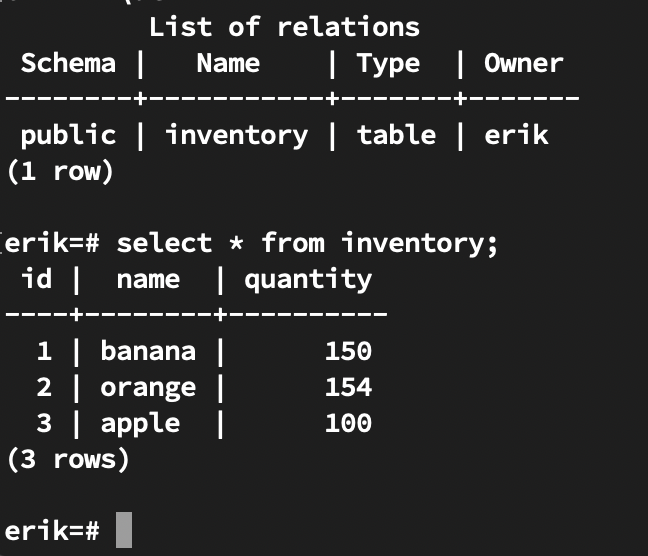

#### 講師提醒
---
什麼時候要 commit ?

當你需要進行資料庫修改的操作都需要，查詢沒有修改資料庫則不用

可以設定 conn.autocommit = True 就不用寫 commit 囉！
```
import psycopg2
conn = psycopg2.connect("dbname='db' user='user' host='localhost' password='password'")
conn.autocommit = True
```
或是
```
import psycopg2
conn = psycopg2.connect("dbname='db' user='user' host='localhost' password='password'")
con.set_session(autocommit=True)
```

## 步驟 3: Select data
---

In [3]:
# Construct connection string
conn_string = "host={0} user={1} dbname={2} password={3} sslmode={4}".format(host, user, dbname, password, sslmode)
conn = psycopg2.connect(conn_string)
print("Connection established")

cursor = conn.cursor()
# Fetch all rows from table
cursor.execute("SELECT * FROM inventory;")
rows = cursor.fetchall()

# Print all rows
for row in rows:
    print("Data row = (%s, %s, %s)" %(str(row[0]), str(row[1]), str(row[2])))

cursor.close()
conn.close()

Connection established
Data row = (1, banana, 150)
Data row = (2, orange, 154)
Data row = (3, apple, 100)


### 講師提醒 
---
養成連線用完一定要關閉，避免佔用資源 <br>
另外如果程式碼呼叫資料庫過程中發生任何事情，我們最後要讓他中斷連線 <br>
可以先用下一堂課的 finally 來完成 <br>

In [11]:
# Construct connection string
conn_string = "host={0} user={1} dbname={2} password={3}".format(host, user, dbname, password, sslmode)
try:
    conn = psycopg2.connect(conn_string)
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM inventory;")
    rows = cursor.fetchall()
    # Print all rows
    for row in rows:
        print("Data row = (%s, %s, %s)" %(str(row[0]), str(row[1]), str(row[2])))
except Exception as e:
    raise e
finally:
    cursor.close()
    conn.close()

Data row = (1, banana, 150)
Data row = (2, orange, 154)
Data row = (3, apple, 100)


In [10]:
conn

<connection object at 0x104097e10; dsn: 'user=erik password=xxx dbname=erik host=localhost', closed: 1>

### 講師提醒 
---
- fetchall() 會一次取得 select 查詢的所有資料
  由於一次對資料庫進行全部資料讀取，情況適用於資料較小的時候；若資料庫資料過於龐大，會導致暫存記憶體不夠而無法讀取成功
  
  可以改使用 fetechmany 方法
- fetchone() 只會取一筆
- fetchmany(n) 取 n 筆
  ```
  while True:
    results = cursor.fetchmany(n)
    if not results:
        break
    for result in results:
        yield result
  ```

## 步驟 4: Update data
---

In [12]:
try:
    conn = psycopg2.connect(conn_string)
    cursor = conn.cursor()
    # Update a data row in the table
    cursor.execute("UPDATE inventory SET quantity = %s WHERE name = %s;", (200, "banana"))
    print("Updated 1 row of data")
except Exception as e:
    raise e
finally:
    cursor.close()
    conn.close()

Updated 1 row of data


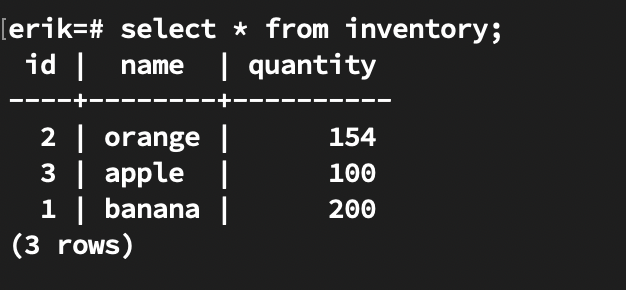

## 步驟 5: Delete data
---

In [13]:
try:
    conn = psycopg2.connect(conn_string)
    cursor = conn.cursor()
    # Delete data row from table
    cursor.execute("DELETE FROM inventory WHERE name = %s;", ("orange",))
    print("Deleted 1 row of data")
except Exception as e:
    raise e
finally:
    cursor.close()
    conn.close()

Deleted 1 row of data


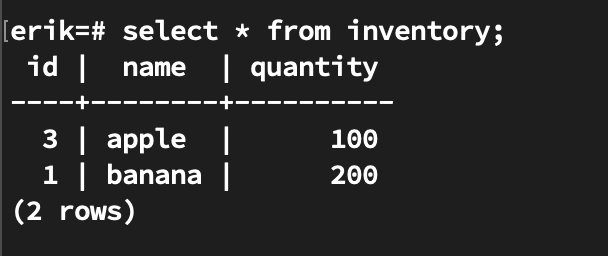

## 步驟 6: Truncate Table
---

In [14]:
try:
    conn = psycopg2.connect(conn_string)
    cursor = conn.cursor()
    # Delete data row from table
    cursor.execute("TRUNCATE inventory;")
    print("TRUNCATE TABLE")
except Exception as e:
    raise e
finally:
    cursor.close()
    conn.close()

TRUNCATE TABLE


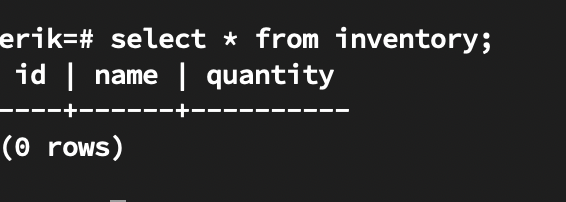

## 步驟 7: Drop Table
---

In [15]:
try:
    conn = psycopg2.connect(conn_string)
    cursor = conn.cursor()
    # Delete data row from table
    cursor.execute("DROP TABLE inventory;")
    print("DROP TABLE")
except Exception as e:
    raise e
finally:
    cursor.close()
    conn.close()

DROP TABLE


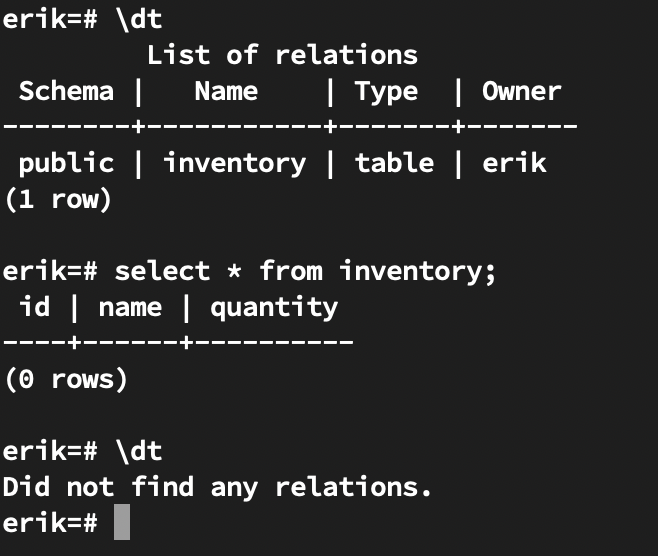

# 4. SQL Injection
---

SQL Injection 是 SQL 注入攻擊，是一種常見的攻擊侵害的手法
```
name = 'Erik'
result = cursor.execute(f'''
select * from employee where name = '{name}'
''')
print(result.fetchall())
```
若我們讓使用者自己設定名稱，也就是使用者可以動態去調整 SQL 敘述的結果，有心人士可以做...

故意讓 where 的條件永遠成立，就可以有意想不到的後果
```
name = "1' or '1'= '1"
result = cursor.execute(f'''
select * from employee where name = '{name}'
''')
print(result.fetchall())
```

#### 正常的輸入方式

In [21]:
# Construct connection string
conn_string = "host={0} user={1} dbname={2} password={3} sslmode={4}".format(host, user, dbname, password, sslmode)
conn = psycopg2.connect(conn_string)
print("Connection established")

cursor = conn.cursor()
your_input = "apple"
# Fetch all rows from table
sqlstring = f'''
SELECT * FROM inventory where name = '{your_input}'
'''
print(sqlstring)
cursor.execute(sqlstring)
rows = cursor.fetchall()

# Print all rows
for row in rows:
    print("Data row = (%s, %s, %s)" %(str(row[0]), str(row[1]), str(row[2])))

cursor.close()
conn.close()

Connection established

SELECT * FROM inventory where name = 'apple'

Data row = (3, apple, 100)


#### 壞人的輸入方式

In [20]:
# Construct connection string
conn_string = "host={0} user={1} dbname={2} password={3} sslmode={4}".format(host, user, dbname, password, sslmode)
conn = psycopg2.connect(conn_string)
print("Connection established")

cursor = conn.cursor()
your_input = "1' or '1'= '1"
# Fetch all rows from table
sqlstring = f'''
SELECT * FROM inventory where name = '{your_input}'
'''
print(sqlstring)
cursor.execute(sqlstring)
rows = cursor.fetchall()

# Print all rows
for row in rows:
    print("Data row = (%s, %s, %s)" %(str(row[0]), str(row[1]), str(row[2])))

cursor.close()
conn.close()

Connection established

SELECT * FROM inventory where name = '1' or '1'= '1'

Data row = (1, banana, 150)
Data row = (2, orange, 154)
Data row = (3, apple, 100)


#### 更安全的輸入方式

In [28]:
# Construct connection string
conn_string = "host={0} user={1} dbname={2} password={3} sslmode={4}".format(host, user, dbname, password, sslmode)
conn = psycopg2.connect(conn_string)
print("Connection established")

cursor = conn.cursor()
your_input = "1' or '1'= '1"
# Fetch all rows from table
sqlstring = f'''
SELECT * FROM inventory where name = %s
'''
print(sqlstring, (your_input,))
cursor.execute(sqlstring, (your_input,))
rows = cursor.fetchall()

# Print all rows
for row in rows:
    print("Data row = (%s, %s, %s)" %(str(row[0]), str(row[1]), str(row[2])))

cursor.close()
conn.close()

Connection established

SELECT * FROM inventory where name = %s
 ("1' or '1'= '1",)


In [29]:
# Construct connection string
conn_string = "host={0} user={1} dbname={2} password={3} sslmode={4}".format(host, user, dbname, password, sslmode)
conn = psycopg2.connect(conn_string)
print("Connection established")

cursor = conn.cursor()
your_input = "apple"
# Fetch all rows from table
sqlstring = f'''
SELECT * FROM inventory where name = %s
'''
print(sqlstring, (your_input,))
cursor.execute(sqlstring, (your_input,))
rows = cursor.fetchall()

# Print all rows
for row in rows:
    print("Data row = (%s, %s, %s)" %(str(row[0]), str(row[1]), str(row[2])))

cursor.close()
conn.close()

Connection established

SELECT * FROM inventory where name = %s
 ('apple',)
Data row = (3, apple, 100)
